In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter
from pdbfixer import PDBFixer
from openmm.app import PDBFile


settings = Settings(name='test_full0.5')
settings.replicates = 3
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "LXRa_test"


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Atte

In [2]:
### add code to read in sequence from CIF file instead of copying it manually

In [3]:
sequence = """MSLWLGAPVPDIPPDSAVELWKPGAQDASSQAQGGSSCILREEARMPHSAGGTAGVGLEAAEPTALLTRAEPPSEPTEIR
PQKRKKGPAPKMLGNELCSVCGDKASGFHYNVLSCEGCKGFFRRSVIKGAHYICHSGGHCPMDTYMRRKCQECRLRKCRQ
AGMREECVLSEEQIRLKKLKRQEEEQAHATSLPPRASSPPQILPQLSPEQLGMIEKLVAAQQQCNRRSFSDRLRVTPWPM
APDPHSREARQQRFAHFTELAIVSVQEIVDFAKQLPGFLQLSREDQIALLKTSAIEVMLLETSRRYNPGSESITFLKDFS
YNREDFAKAGLQVEFINPIFEFSRAMNELQLNDAEFALLIAISIFSADRPNVQDQLQVERLQHTYVEALHAYVSIHHPHD
RLMFPRMLMKLVSLRTLSSVHSEQVFALRLQDKKLPPLLSEIWDVHE"""

# strip sequence of non letters
sequence = ''.join([i for i in sequence if i.isalpha()])

print(sequence)

MSLWLGAPVPDIPPDSAVELWKPGAQDASSQAQGGSSCILREEARMPHSAGGTAGVGLEAAEPTALLTRAEPPSEPTEIRPQKRKKGPAPKMLGNELCSVCGDKASGFHYNVLSCEGCKGFFRRSVIKGAHYICHSGGHCPMDTYMRRKCQECRLRKCRQAGMREECVLSEEQIRLKKLKRQEEEQAHATSLPPRASSPPQILPQLSPEQLGMIEKLVAAQQQCNRRSFSDRLRVTPWPMAPDPHSREARQQRFAHFTELAIVSVQEIVDFAKQLPGFLQLSREDQIALLKTSAIEVMLLETSRRYNPGSESITFLKDFSYNREDFAKAGLQVEFINPIFEFSRAMNELQLNDAEFALLIAISIFSADRPNVQDQLQVERLQHTYVEALHAYVSIHHPHDRLMFPRMLMKLVSLRTLSSVHSEQVFALRLQDKKLPPLLSEIWDVHE


In [4]:
# convert sequence to FASTA format
def write_fasta(sequence, header, file_name):
    """
    Writes a single-letter amino acid sequence to a FASTA file.
    
    Parameters:
    - sequence: A string containing the amino acid sequence.
    - header: A string to be used as the header in the FASTA file.
    - file_name: The name of the FASTA file to be created.
    """
    with open(file_name, 'w') as fasta_file:
        # Write the header with the '>' symbol
        fasta_file.write(f">{header}\n")
        
        # Write the sequence in lines of 80 characters
        for i in range(0, len(sequence), 80):
            fasta_file.write(sequence[i:i+80] + "\n")


In [5]:
fasta_path = os.path.join("raw_data", "LXRalpha", 'LXRa.fasta')
write_fasta(sequence, 'LXRa', fasta_path)

In [6]:
raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRalpha.csv"

raw_hdx = pd.read_csv(raw_hdx_path)

In [7]:
raw_hdx['UptakeFraction'] = raw_hdx['Uptake'] / raw_hdx['MaxUptake']

columns_to_drop = ["Protein", "Sequence", "Fragment", "Modification", "State", "MaxUptake", "Uptake", "MHP", "Center", "Center SD", "Uptake", "Uptake SD", "RT", "RT SD"]

raw_hdx = raw_hdx.drop(columns=columns_to_drop)

raw_hdx.head()

Start  End  Exposure  UptakeFraction
0    200  213       0.5        0.420276
1    200  213      10.0        0.439171
2    202  206       0.5        0.444671
3    202  206      10.0        0.541777
4    204  213       0.5        0.515639

In [8]:

# pivot exposure and uptake fraction
raw_hdx = raw_hdx.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

raw_hdx.head()


Start  End  Exposure  UptakeFraction
0    200  213       0.5        0.420276
1    200  213      10.0        0.439171
2    202  206       0.5        0.444671
3    202  206      10.0        0.541777
4    204  213       0.5        0.515639

In [9]:

# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(raw_hdx)

     Start  End  Exposure  UptakeFraction
0      200  213       0.5        0.420276
1      200  213      10.0        0.439171
2      202  206       0.5        0.444671
3      202  206      10.0        0.541777
4      204  213       0.5        0.515639
5      204  213      10.0        0.549359
6      214  219       0.5        0.397378
7      214  219      10.0        0.491183
8      218  233       0.5        0.320350
9      218  233      10.0        0.337513
10     220  229       0.5        0.287265
11     220  229      10.0        0.304268
12     220  233       0.5        0.289530
13     220  233      10.0        0.301570
14     221  233       0.5        0.290460
15     221  233      10.0        0.308812
16     222  233       0.5        0.313111
17     222  233      10.0        0.329153
18     234  240       0.5        0.394215
19     234  240      10.0        0.418820
20     234  248       0.5        0.231529
21     234  248      10.0        0.255082
22     234  251       0.5        0

In [10]:
# conver to HDXer format ie start, end, exposure_1, exposure_2 

# pivot so that exposure time is the column name drop the exposure column
hdx = raw_hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# change Start to ResStr and End to ResEnd
hdx = hdx.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# drop the exposure column
hdx.columns.name = None

print(hdx)


    ResStr  ResEnd       0.5      10.0
0      200     213  0.420276  0.439171
1      202     206  0.444671  0.541777
2      204     213  0.515639  0.549359
3      214     219  0.397378  0.491183
4      218     233  0.320350  0.337513
5      220     229  0.287265  0.304268
6      220     233  0.289530  0.301570
7      221     233  0.290460  0.308812
8      222     233  0.313111  0.329153
9      234     240  0.394215  0.418820
10     234     248  0.231529  0.255082
11     234     251  0.228909  0.268843
12     249     257  0.181442  0.220665
13     261     266  0.448474  0.513589
14     261     267  0.446068  0.523586
15     267     271  0.035227  0.165512
16     271     278  0.098404  0.267671
17     272     278  0.117940  0.280327
18     279     286  0.231769  0.293596
19     282     289  0.101470  0.171960
20     282     290  0.088867  0.180641
21     290     294  0.332861  0.404824
22     290     296  0.306672  0.395630
23     295     299  0.051759  0.145845
24     299     311  0.260

In [11]:

hdx = hdx.round(5)
hdx.to_csv(os.path.join("raw_data", "LXRalpha", 'LXRa_APO.dat'), sep=' ', index=False)


In [12]:
segs = raw_hdx[['Start', 'End']].drop_duplicates().sort_values(by=['Start', 'End']).reset_index(drop=True)


In [13]:

# convert to list of tuples
segs = [tuple(x) for x in segs.values]

print(segs)


[(200, 213), (202, 206), (204, 213), (214, 219), (218, 233), (220, 229), (220, 233), (221, 233), (222, 233), (234, 240), (234, 248), (234, 251), (249, 257), (261, 266), (261, 267), (267, 271), (271, 278), (272, 278), (279, 286), (282, 289), (282, 290), (290, 294), (290, 296), (295, 299), (299, 311), (300, 311), (300, 312), (300, 314), (303, 311), (312, 316), (319, 324), (319, 326), (319, 331), (320, 326), (321, 326), (325, 331), (327, 331), (335, 340), (335, 341), (336, 341), (341, 348), (342, 348), (342, 349), (349, 353), (349, 355), (349, 356), (350, 356), (352, 356), (360, 365), (365, 376), (366, 376), (366, 377), (366, 378), (368, 376), (371, 380), (377, 381), (377, 384), (377, 385), (377, 386), (377, 387), (377, 389), (379, 389), (382, 389), (385, 389), (405, 409), (408, 413), (408, 418), (412, 426), (412, 427), (414, 420), (414, 426), (414, 427), (415, 420), (415, 427), (417, 426), (421, 426), (421, 427), (427, 439), (427, 440), (427, 441), (428, 439), (428, 440), (428, 442), (43

In [14]:


# write list as new lines with space delimiter
with open(os.path.join("raw_data", "LXRalpha", 'LXRa_APO_segs.txt'), 'w') as f:
    for item in segs:
        f.write("%s\n" % ' '.join(map(str, item)))

In [15]:

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO"

# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [16]:
def pre_process_main():
    # BPTI data
    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO"

    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    os.listdir(BPTI_dir)

    segs_name = "LXRa_APO_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "LXRa_APO.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)
    sim_name = 'LXRa_AF'

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = os.path.join(H_sim_dir, pdb_list[0])
    pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    print(top_path)
    print(pdb_paths)


    small_traj_name = top_path.replace(".pdb","_small.xtc")
    small_traj_path = os.path.join(sim_dir, small_traj_name)

    u = mda.Universe(top_path, pdb_paths)


        
    with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory:
                W.write(u.atoms)

    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = [small_traj_path]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [17]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO.dat
['LXRa_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb', 'LXRa_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb', 'LXRa_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb', 'LXRa_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb']


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000_H.pdb', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000_H.pdb', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_001_alphafold2_ptm_model_4_seed

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/base.py:724: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/XTC.py:105: UserWarning: Reader has no dt information, set to 1.0 ps
  time = ts.time


In [18]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [19]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [20]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [21]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [0.5,10.0]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S0
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S1
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S2
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S3
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S4
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S5
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S6
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S7
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S8
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S9
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S10
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S11
Experiment name

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/calc_hdx_train_LXRa_test_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/out__train_LXRa_test_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/out__train_LXRa_test_1Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat
REWIGHTING train_LXRa_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1'], 'kint_file': '/Users/al

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
         238539 function calls (238101 primitive calls) in 0.201 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  c

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/calc_hdx_train_LXRa_test_2.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/out__train_LXRa_test_2 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/out__train_LXRa_test_2Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/train_LXRa_test_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/out__train_LXRa_test_2Intrinsic_rates.dat
REWIGHTING train_LXRa_test_2 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2'], 'kint_file': '/Users/al

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_2/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
         238539 function calls (238101 primitive calls) in 0.209 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  c

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/calc_hdx_train_LXRa_test_3.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/out__train_LXRa_test_3 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/out__train_LXRa_test_3Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/train_LXRa_test_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/out__train_LXRa_test_3Intrinsic_rates.dat
REWIGHTING train_LXRa_test_3 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3'], 'kint_file': '/Users/al

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/AvsB_S21/train_LXRa_test_3/reweighting_gamma_4x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         238539 function calls (238101 primitive calls) in 0.209 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  c

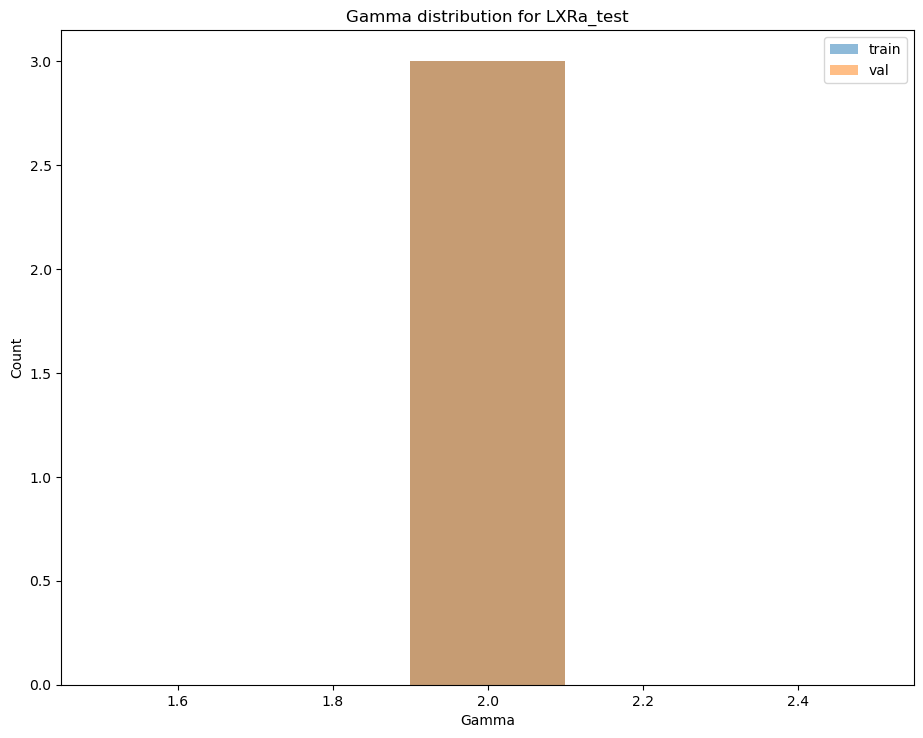

['train_LXRa_test_1', 'train_LXRa_test_2', 'train_LXRa_test_3']
['val_LXRa_test_1', 'val_LXRa_test_2', 'val_LXRa_test_3']
plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0

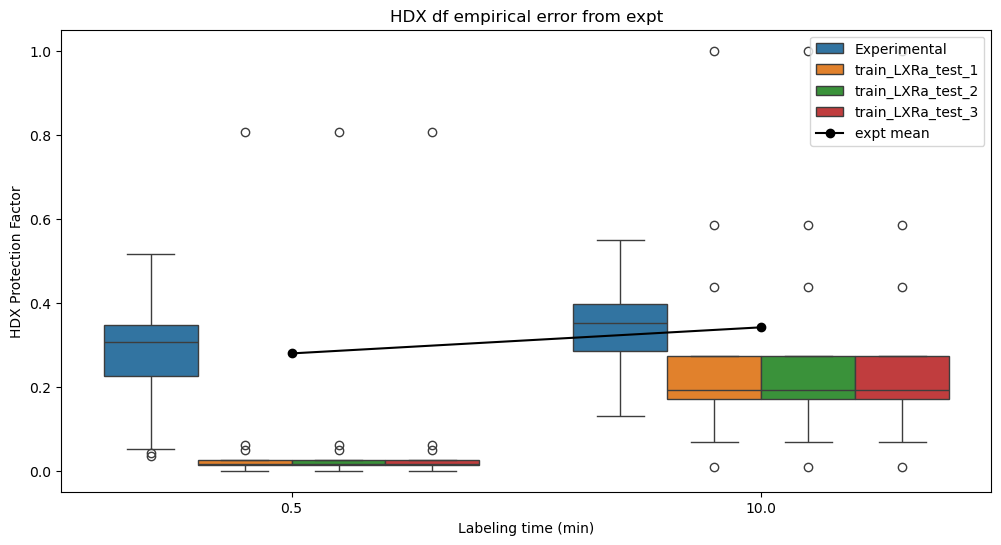

plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental     N

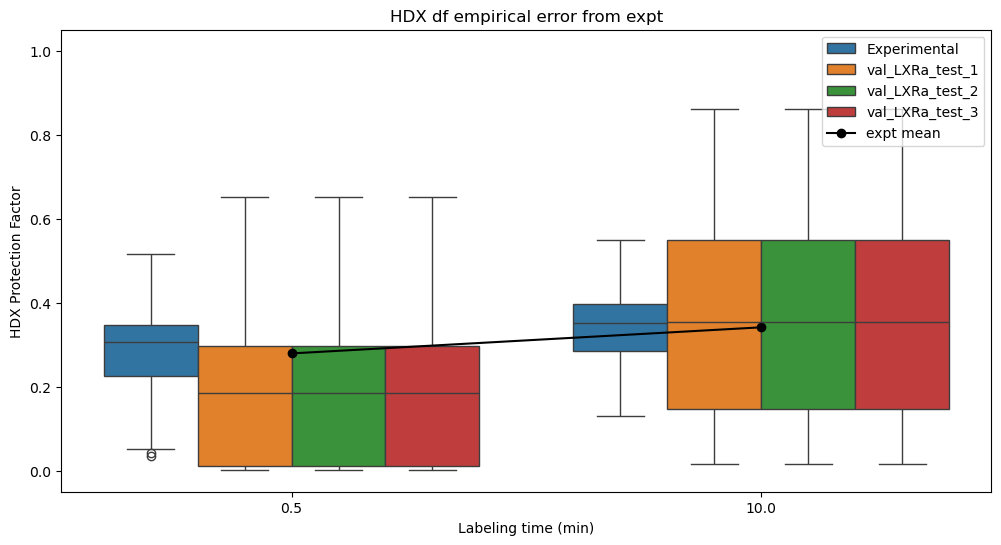

Restoring trainval peptide numbers
train_rep_names ['train_LXRa_test_1', 'train_LXRa_test_2', 'train_LXRa_test_3']
val_rep_names ['val_LXRa_test_1', 'val_LXRa_test_2', 'val_LXRa_test_3']
test_rep_names ['test_LXRa_test_1', 'test_LXRa_test_2', 'test_LXRa_test_3']
train_rep_peptides [1, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
val_rep_peptides [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
train_rep_peptides [1, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
val_rep_peptides [4, 5, 6, 7, 8, 9, 10

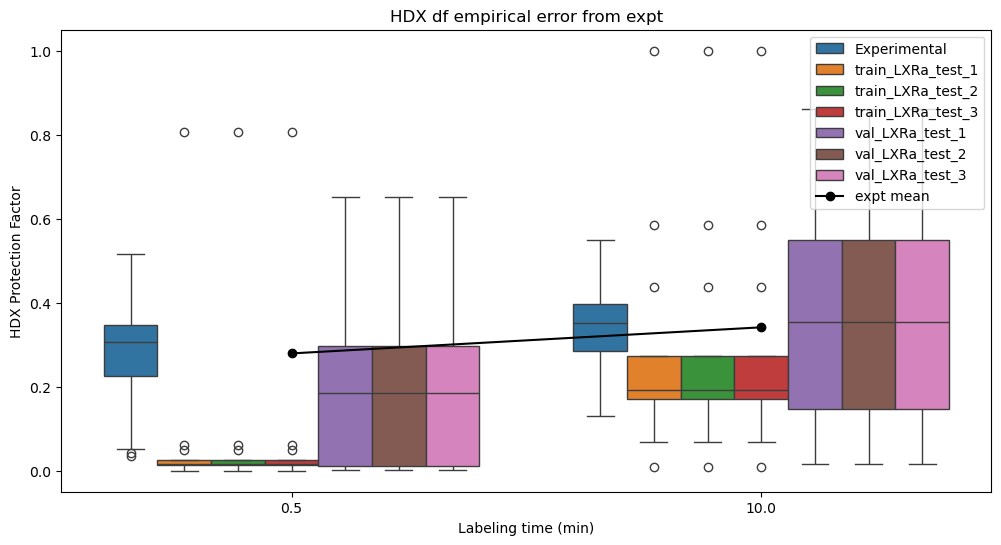

plotting paired errors
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental   

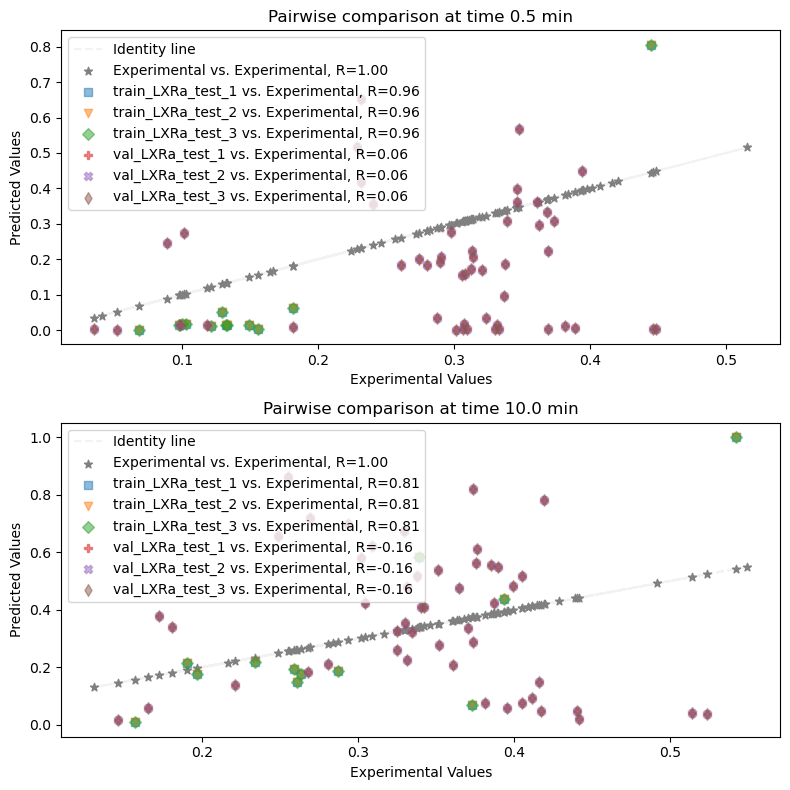

plotting paired trainval agreement
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Exp

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train

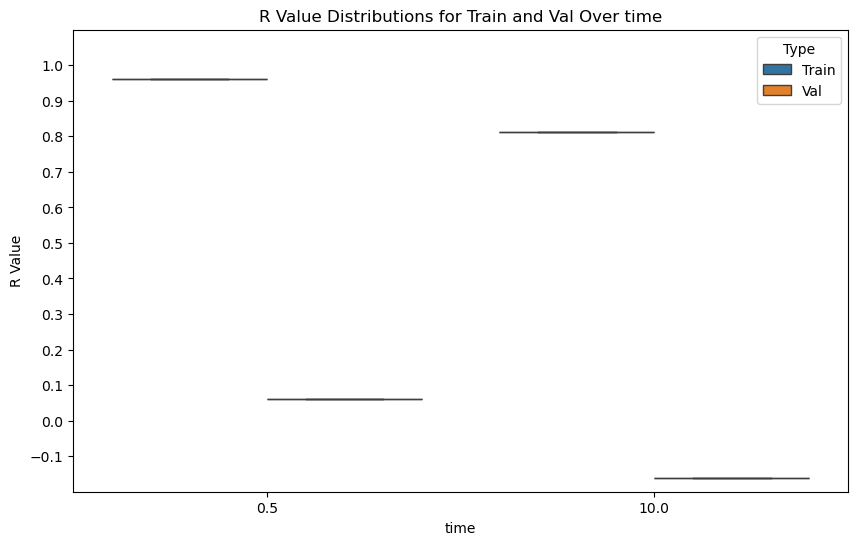

nan_df
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.805740  0.999990        1  train_LXRa_test_1     NaN     NaN   
1    0.003900  0.069170       55  train_LXRa_test_1     NaN     NaN   
2    0.014880  0.187340       56  train_LXRa_test_1     NaN     NaN   
3    0.016610  0.219100       57  train_LXRa_test_1     NaN     NaN   
4    0.014770  0.194860       58  train_LXRa_test_1     NaN     NaN   
5    0.013350  0.176570       59  train_LXRa_test_1     NaN     NaN   
6    0.011200  0.148690       60  train_LXRa_test_1     NaN     NaN   
7    0.013400  0.177540       61  train_LXRa_test_1     NaN     NaN   
8    0.016970  0.215300       62  train_LXRa_test_1     NaN     NaN   
9    0.000400  0.007880       63  train_LXRa_test_1     NaN     NaN   
10   0.049790  0.437310       64  train_LXRa_test_1     NaN     NaN   
11   0.061830  0.584470       65  train_LXRa_test_1     NaN     NaN   
12        NaN       NaN        4  train_LXRa_test_1   218.0   233.0   

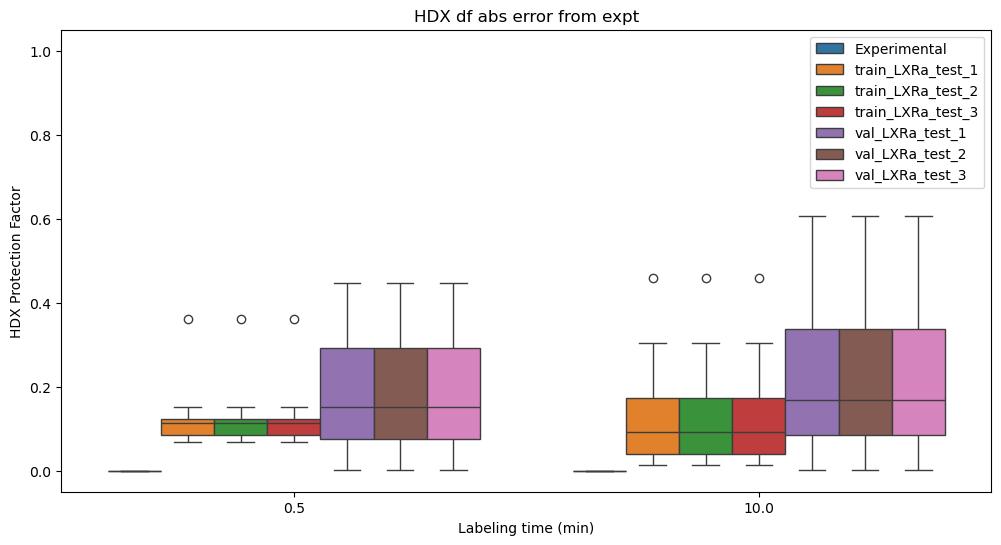

plot_dfracs_compare_MSE
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.805740  0.999990        1  train_LXRa_test_1     NaN     NaN   
1    0.003900  0.069170       55  train_LXRa_test_1     NaN     NaN   
2    0.014880  0.187340       56  train_LXRa_test_1     NaN     NaN   
3    0.016610  0.219100       57  train_LXRa_test_1     NaN     NaN   
4    0.014770  0.194860       58  train_LXRa_test_1     NaN     NaN   
5    0.013350  0.176570       59  train_LXRa_test_1     NaN     NaN   
6    0.011200  0.148690       60  train_LXRa_test_1     NaN     NaN   
7    0.013400  0.177540       61  train_LXRa_test_1     NaN     NaN   
8    0.016970  0.215300       62  train_LXRa_test_1     NaN     NaN   
9    0.000400  0.007880       63  train_LXRa_test_1     NaN     NaN   
10   0.049790  0.437310       64  train_LXRa_test_1     NaN     NaN   
11   0.061830  0.584470       65  train_LXRa_test_1     NaN     NaN   
12        NaN       NaN        4  train_LXRa_test_1  

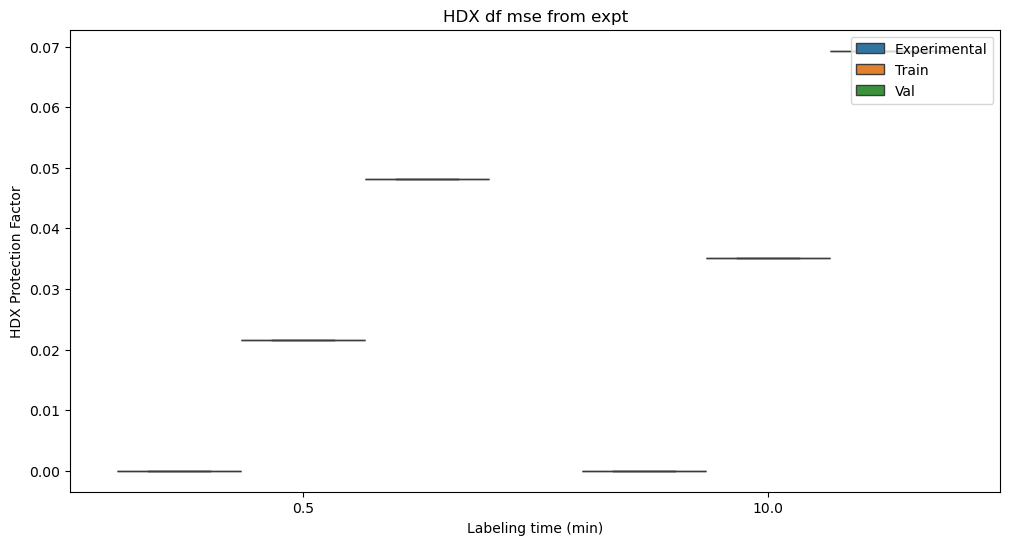

Saving experiment to:  logs/AvsB_S21_1707916882.pkl


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR0
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR1
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR2
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR3
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR4
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR5
Experiment name LvsX_SR already exists. Attempting to change name to LvsX_SR6
Preparing HDX data for Experimental
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO.dat
AVG: ncol = 4, len(names) = 2
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

    

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/calc_hdx_train_LXRa_test_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/out__train_LXRa_test_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/out__train_LXRa_test_1Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat
REWIGHTING train_LXRa_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1'], 'kint_file': '/Users/al

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
         238749 function calls (238311 primitive calls) in 0.313 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  c

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/calc_hdx_train_LXRa_test_2.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/out__train_LXRa_test_2 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/out__train_LXRa_test_2Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/train_LXRa_test_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/out__train_LXRa_test_2Intrinsic_rates.dat
REWIGHTING train_LXRa_test_2 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2'], 'kint_file': '/Users/al

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_2/reweighting_gamma_3x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         238599 function calls (238161 primitive calls) in 0.235 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  c

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/calc_hdx_train_LXRa_test_3.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/out__train_LXRa_test_3 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/out__train_LXRa_test_3Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/train_LXRa_test_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/out__train_LXRa_test_3Intrinsic_rates.dat
REWIGHTING train_LXRa_test_3 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3'], 'kint_file': '/Users/al

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/LvsX_SR6/train_LXRa_test_3/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
         238524 function calls (238086 primitive calls) in 0.199 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  c

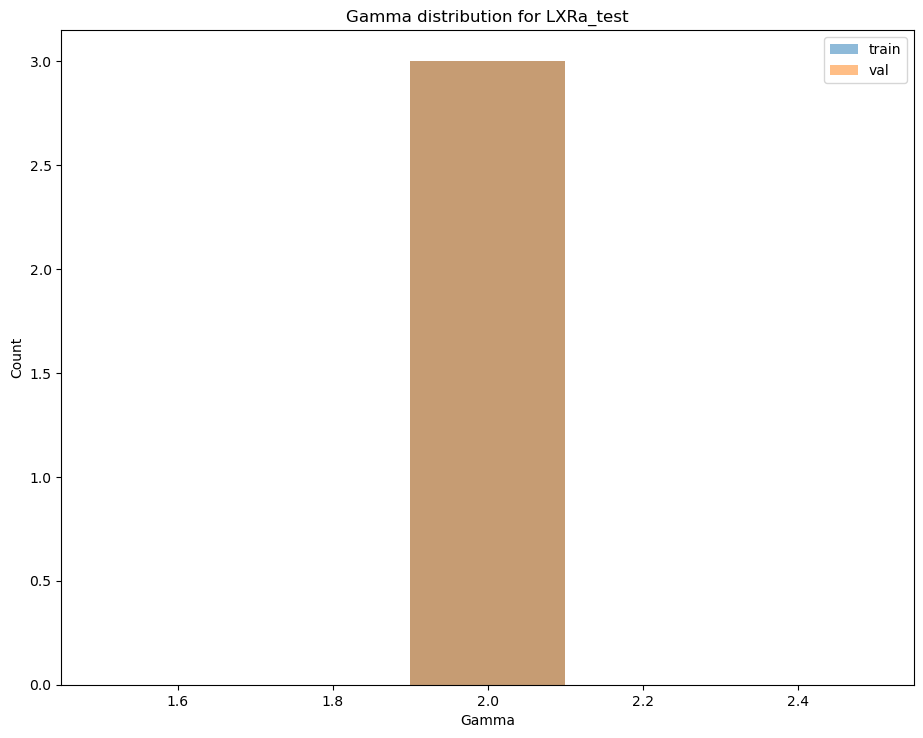

['train_LXRa_test_1', 'train_LXRa_test_2', 'train_LXRa_test_3']
['val_LXRa_test_1', 'val_LXRa_test_2', 'val_LXRa_test_3']
plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0

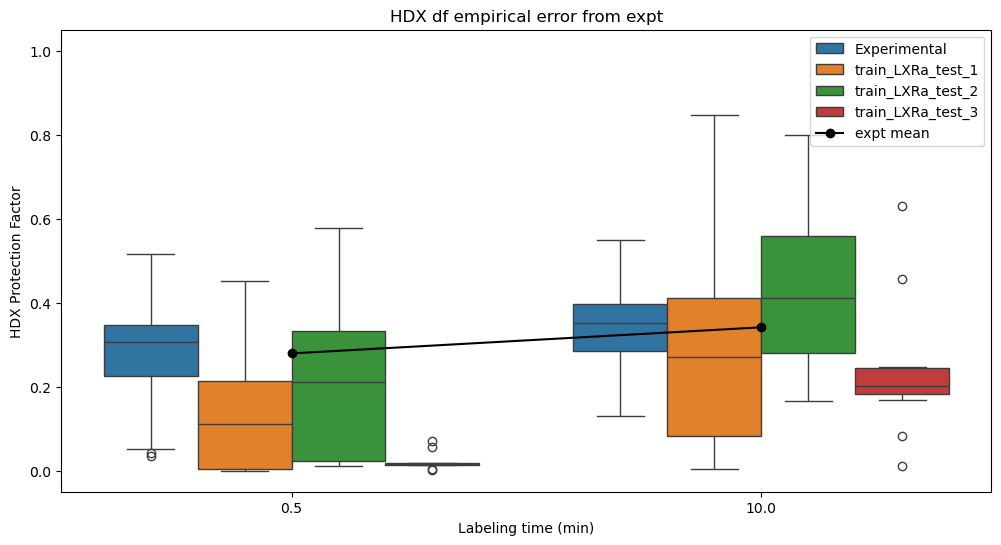

plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental     N

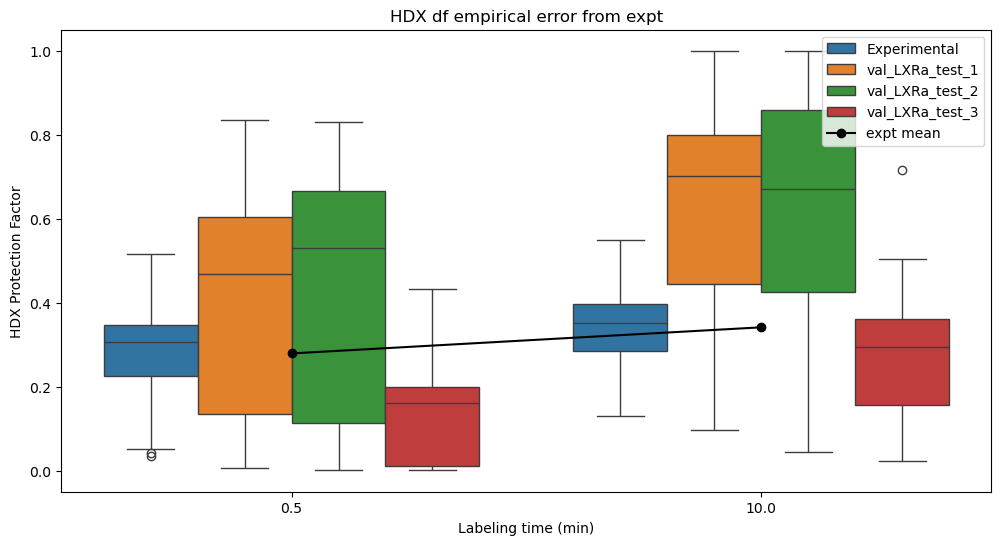

Restoring trainval peptide numbers
train_rep_names ['train_LXRa_test_1', 'train_LXRa_test_2', 'train_LXRa_test_3']
val_rep_names ['val_LXRa_test_1', 'val_LXRa_test_2', 'val_LXRa_test_3']
test_rep_names ['test_LXRa_test_1', 'test_LXRa_test_2', 'test_LXRa_test_3']
train_rep_peptides [3, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 69, 72]
val_rep_peptides [1, 9, 10, 11, 12, 64]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
train_rep_peptides [13, 14, 15, 29, 30, 31, 32, 33, 34, 35, 36, 75, 76, 84, 85, 86]
val_rep_peptides [9, 10, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 69, 72]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

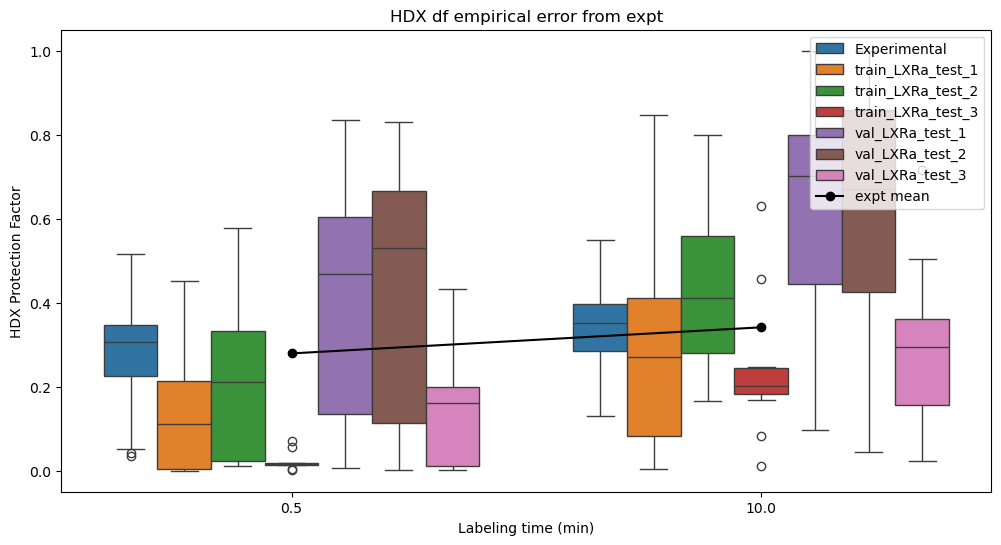

plotting paired errors
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental   

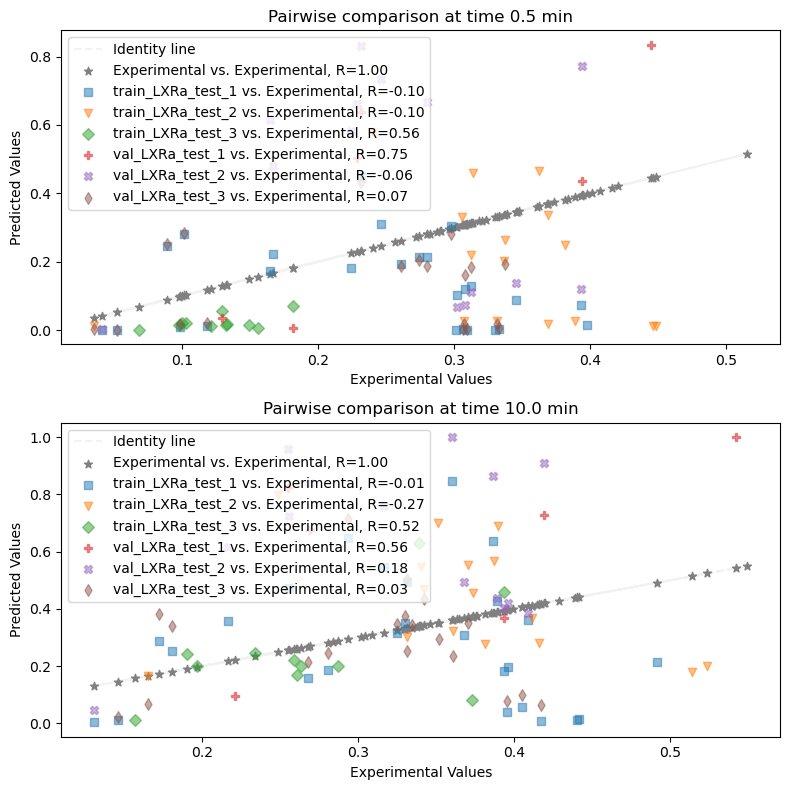

plotting paired trainval agreement
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Exp

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train

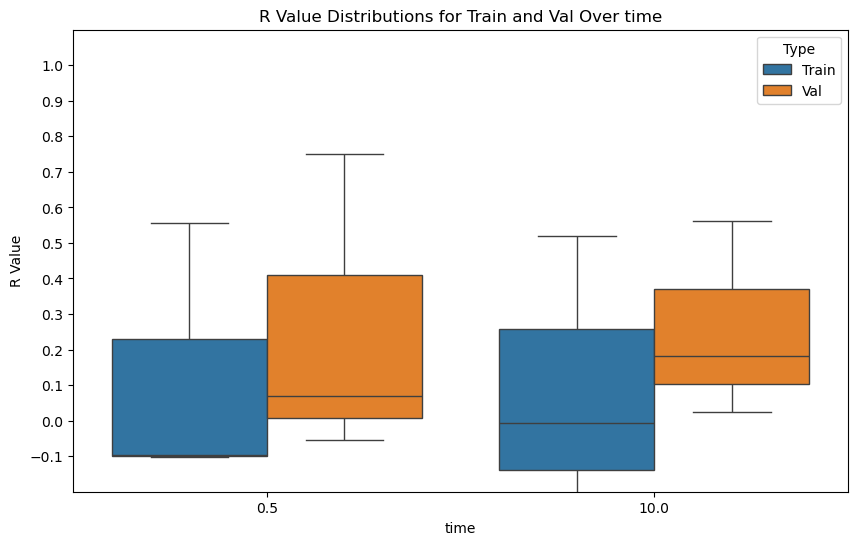

nan_df
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.016120  0.214590        3  train_LXRa_test_1     NaN     NaN   
1    0.010170  0.156700       16  train_LXRa_test_1     NaN     NaN   
2    0.012180  0.187630       17  train_LXRa_test_1     NaN     NaN   
3    0.450730  0.649040       18  train_LXRa_test_1     NaN     NaN   
4    0.280690  0.289230       19  train_LXRa_test_1     NaN     NaN   
5    0.245630  0.253610       20  train_LXRa_test_1     NaN     NaN   
6    0.002960  0.056410       21  train_LXRa_test_1     NaN     NaN   
7    0.002160  0.041240       22  train_LXRa_test_1     NaN     NaN   
8    0.000510  0.010090       23  train_LXRa_test_1     NaN     NaN   
9    0.194590  0.317340       24  train_LXRa_test_1     NaN     NaN   
10   0.214040  0.348860       25  train_LXRa_test_1     NaN     NaN   
11   0.305520  0.493300       28  train_LXRa_test_1     NaN     NaN   
12   0.000490  0.009710       37  train_LXRa_test_1     NaN     NaN   

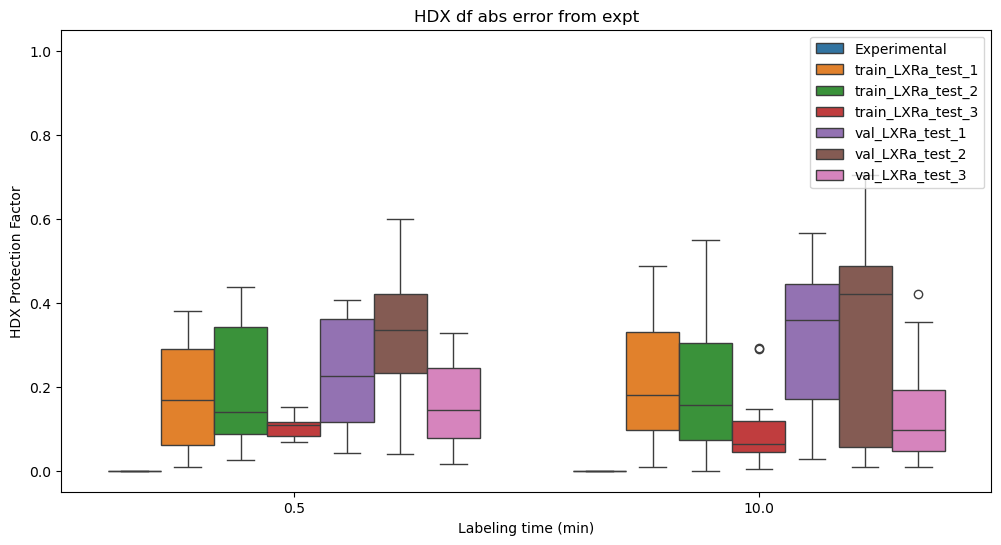

plot_dfracs_compare_MSE
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.016120  0.214590        3  train_LXRa_test_1     NaN     NaN   
1    0.010170  0.156700       16  train_LXRa_test_1     NaN     NaN   
2    0.012180  0.187630       17  train_LXRa_test_1     NaN     NaN   
3    0.450730  0.649040       18  train_LXRa_test_1     NaN     NaN   
4    0.280690  0.289230       19  train_LXRa_test_1     NaN     NaN   
5    0.245630  0.253610       20  train_LXRa_test_1     NaN     NaN   
6    0.002960  0.056410       21  train_LXRa_test_1     NaN     NaN   
7    0.002160  0.041240       22  train_LXRa_test_1     NaN     NaN   
8    0.000510  0.010090       23  train_LXRa_test_1     NaN     NaN   
9    0.194590  0.317340       24  train_LXRa_test_1     NaN     NaN   
10   0.214040  0.348860       25  train_LXRa_test_1     NaN     NaN   
11   0.305520  0.493300       28  train_LXRa_test_1     NaN     NaN   
12   0.000490  0.009710       37  train_LXRa_test_1  

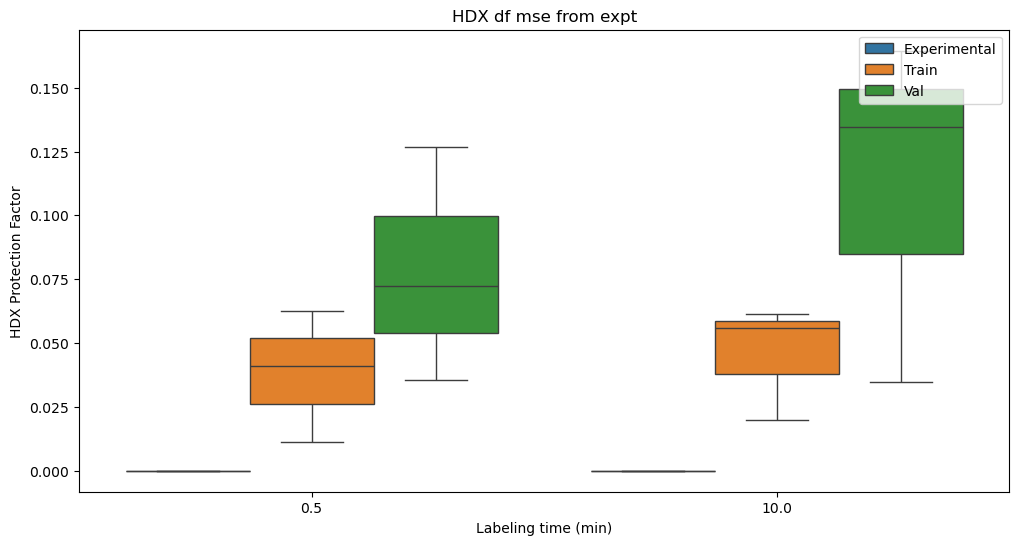

Saving experiment to:  logs/LvsX_SR6_1707916988.pkl


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp0
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp1
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp2
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp3
Experiment name mixAandB_Sp already exists. Attempting to change name to mixAandB_Sp4
Preparing HDX data for Experimental
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO.dat
AVG: ncol = 4, len(names) = 2
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex.

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/calc_hdx_train_LXRa_test_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/out__train_LXRa_test_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexu

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/out__train_LXRa_test_1Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/train_LXRa_test_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/out__train_LXRa_test_1Intrinsic_rates.dat
REWIGHTING train_LXRa_test_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1'], 'ki

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_1/reweighting_gamma_4x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
         238809 function calls (238371 primitive calls) in 0.336 seconds

   Ordered by: cumulative time

   ncalls  tot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/calc_hdx_train_LXRa_test_2.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/out__train_LXRa_test_2 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexu

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/out__train_LXRa_test_2Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/train_LXRa_test_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/out__train_LXRa_test_2Intrinsic_rates.dat
REWIGHTING train_LXRa_test_2 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2'], 'ki

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/reweighting_gamma_3x10^0/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/reweighting_gamma_2x10^0

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_2/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
         238779 function calls (238341 primitive calls) in 0.339 seconds

   Ordered by: cumulative time

   ncalls  tot

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/alphafold_H/LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000_H.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/calc_hdx_train_LXRa_test_3.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/out__train_LXRa_test_3 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexu

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/out__train_LXRa_test_3Segment_average_fractions.dat
AVG: ncol = 4, len(names) = 2
Experimental LXRa_test True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/train_LXRa_test_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/out__train_LXRa_test_3Intrinsic_rates.dat
REWIGHTING train_LXRa_test_3 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3'], 'ki

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/mixAandB_Sp4/train_LXRa_test_3/reweighting_gamma_4x10^0
Contacts readContacts read

Hbonds readHbonds read
Contacts read
Hbonds read

Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         238704 function calls (238266 primitive calls) in 0.280 seconds

   Ordered by: cumulative time

   ncalls  tot

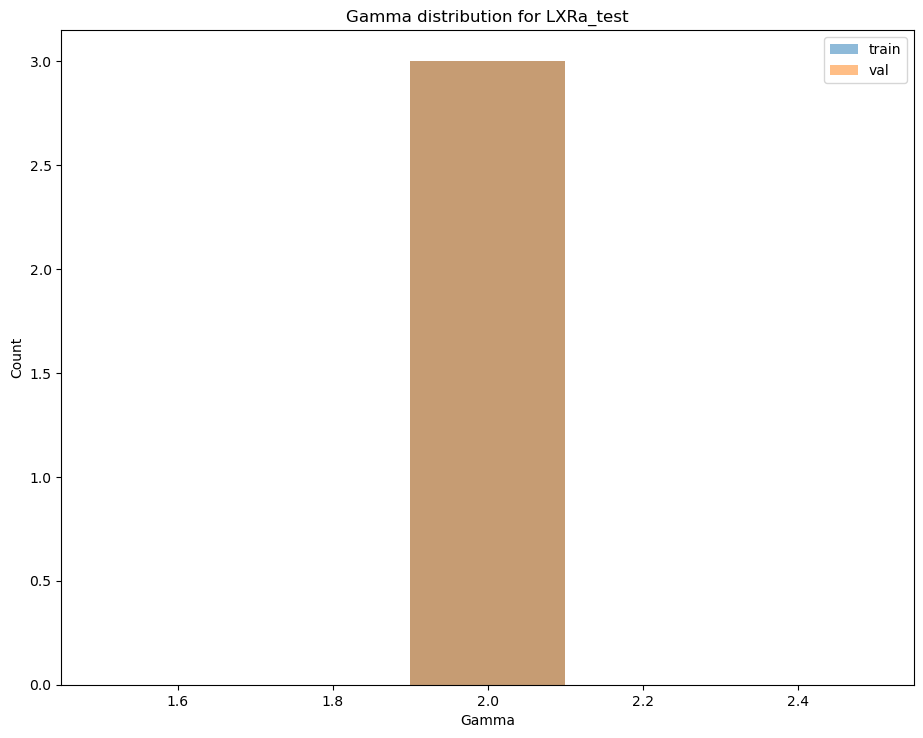

['train_LXRa_test_1', 'train_LXRa_test_2', 'train_LXRa_test_3']
['val_LXRa_test_1', 'val_LXRa_test_2', 'val_LXRa_test_3']
plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0

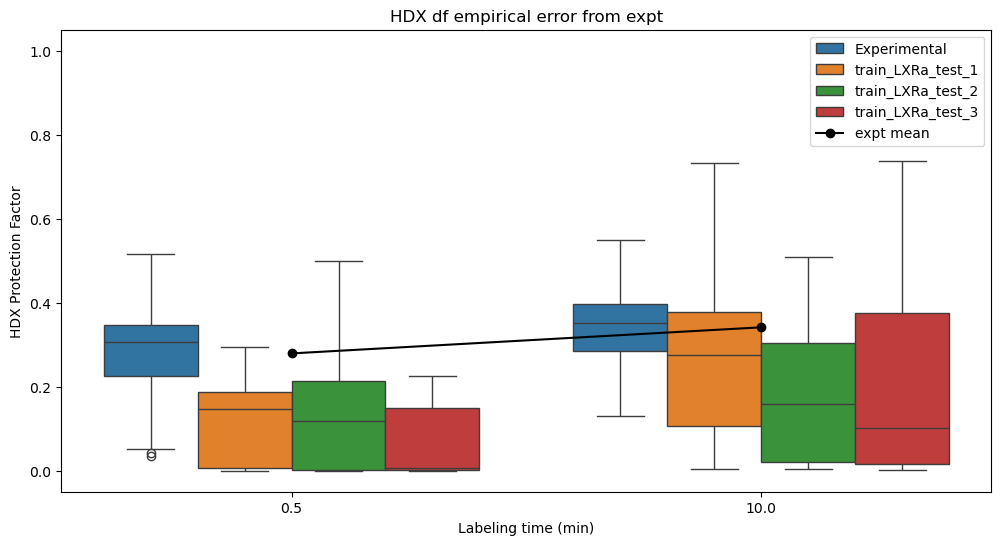

plot_dfracs_compare
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental     N

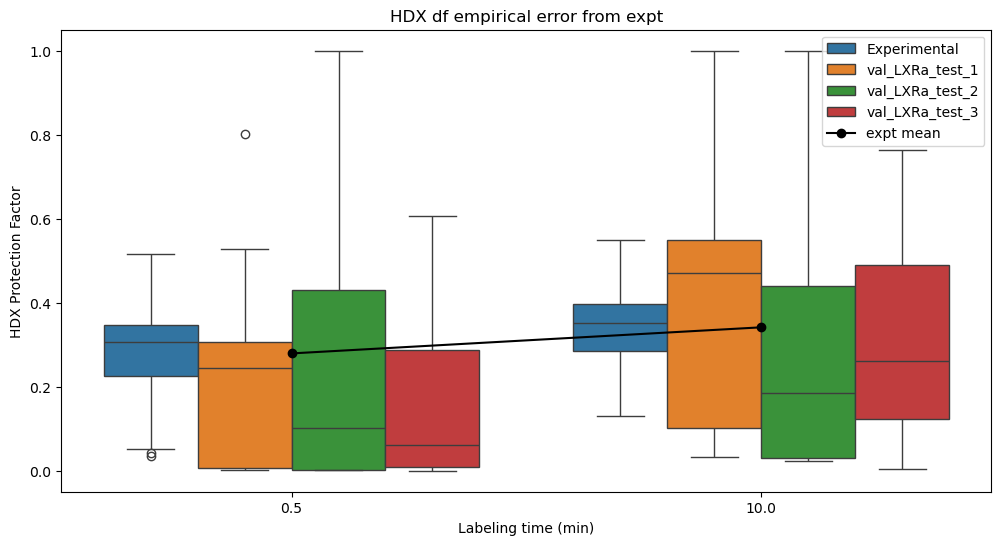

Restoring trainval peptide numbers
train_rep_names ['train_LXRa_test_1', 'train_LXRa_test_2', 'train_LXRa_test_3']
val_rep_names ['val_LXRa_test_1', 'val_LXRa_test_2', 'val_LXRa_test_3']
test_rep_names ['test_LXRa_test_1', 'test_LXRa_test_2', 'test_LXRa_test_3']
train_rep_peptides [4, 5, 6, 7, 8, 13, 14, 15, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
val_rep_peptides [0, 1, 2, 18, 19, 20, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
train_rep_peptides [3, 4, 5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 47, 48, 55, 56, 57, 58, 

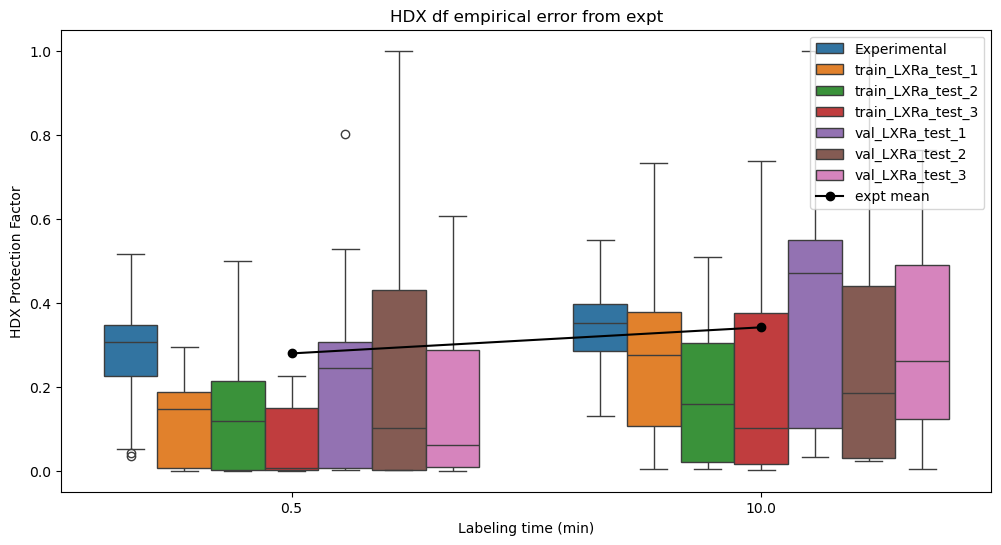

plotting paired errors
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Experimental   

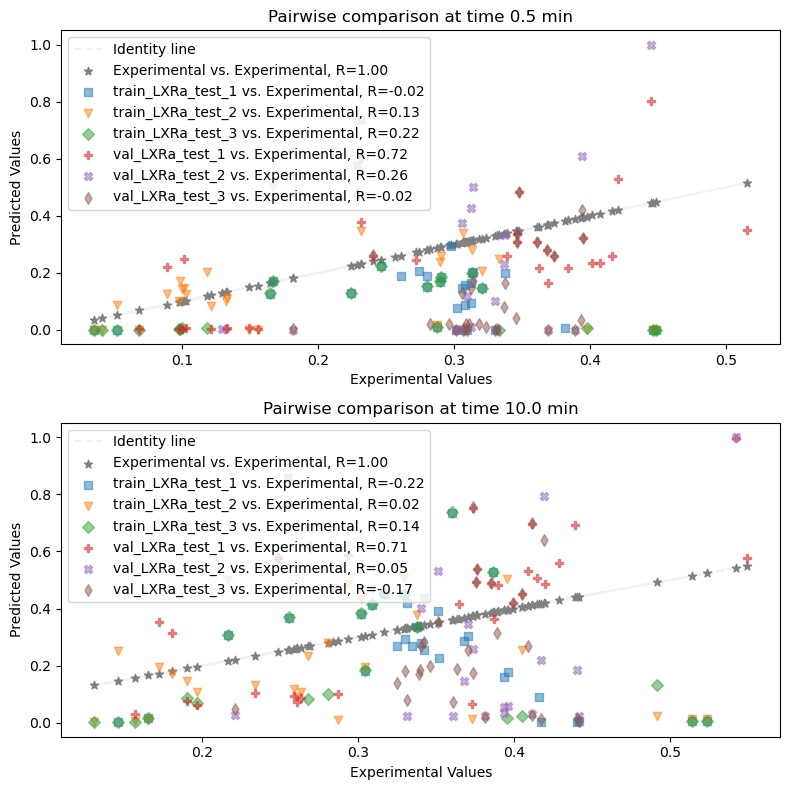

plotting paired trainval agreement
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.420280  0.439170        0       Experimental     NaN     NaN   
1    0.444670  0.541780        1       Experimental     NaN     NaN   
2    0.515640  0.549360        2       Experimental     NaN     NaN   
3    0.397380  0.491180        3       Experimental     NaN     NaN   
4    0.320350  0.337510        4       Experimental     NaN     NaN   
5    0.287260  0.304270        5       Experimental     NaN     NaN   
6    0.289530  0.301570        6       Experimental     NaN     NaN   
7    0.290460  0.308810        7       Experimental     NaN     NaN   
8    0.313110  0.329150        8       Experimental     NaN     NaN   
9    0.394220  0.418820        9       Experimental     NaN     NaN   
10   0.231530  0.255080       10       Experimental     NaN     NaN   
11   0.228910  0.268840       11       Experimental     NaN     NaN   
12   0.181440  0.220670       12       Exp

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train

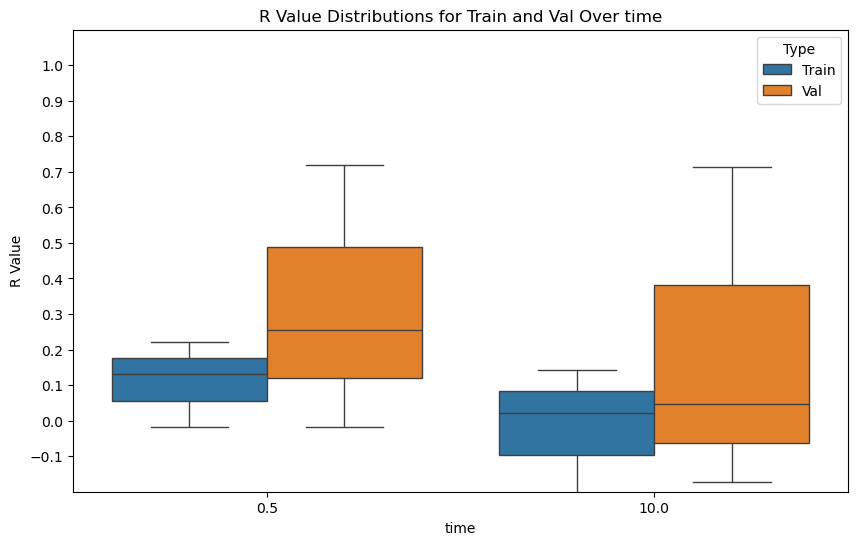

nan_df
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.147330  0.334170        4  train_LXRa_test_1     NaN     NaN   
1    0.010910  0.181920        5  train_LXRa_test_1     NaN     NaN   
2    0.169790  0.381560        6  train_LXRa_test_1     NaN     NaN   
3    0.183930  0.413290        7  train_LXRa_test_1     NaN     NaN   
4    0.200500  0.447790        8  train_LXRa_test_1     NaN     NaN   
5    0.000390  0.007780       13  train_LXRa_test_1     NaN     NaN   
6    0.000390  0.007760       14  train_LXRa_test_1     NaN     NaN   
7    0.000810  0.015870       15  train_LXRa_test_1     NaN     NaN   
8    0.000190  0.003860       23  train_LXRa_test_1     NaN     NaN   
9    0.188220  0.268170       24  train_LXRa_test_1     NaN     NaN   
10   0.207040  0.294910       25  train_LXRa_test_1     NaN     NaN   
11   0.188220  0.268110       26  train_LXRa_test_1     NaN     NaN   
12   0.159270  0.226980       27  train_LXRa_test_1     NaN     NaN   

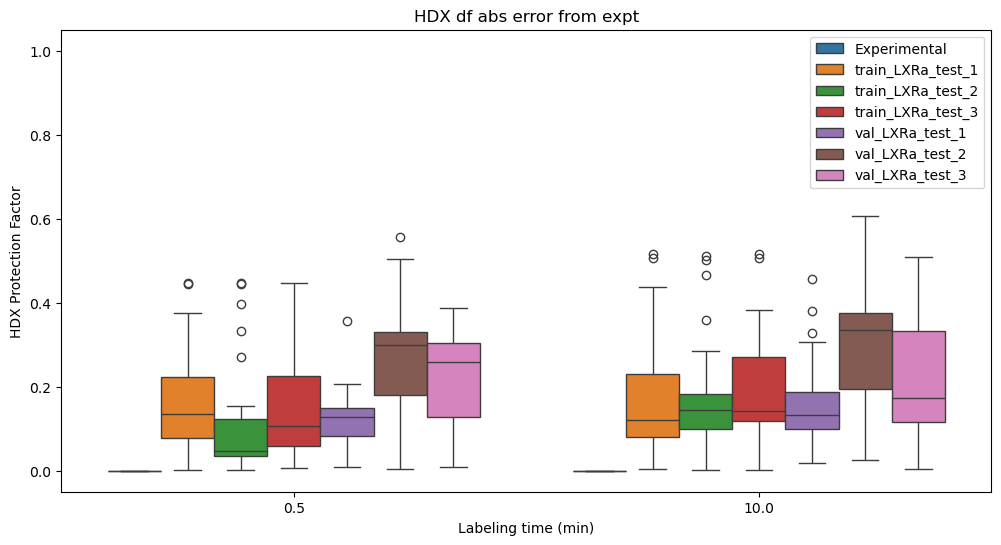

plot_dfracs_compare_MSE
          0.5      10.0  peptide          calc_name  ResStr  ResEnd  \
0    0.147330  0.334170        4  train_LXRa_test_1     NaN     NaN   
1    0.010910  0.181920        5  train_LXRa_test_1     NaN     NaN   
2    0.169790  0.381560        6  train_LXRa_test_1     NaN     NaN   
3    0.183930  0.413290        7  train_LXRa_test_1     NaN     NaN   
4    0.200500  0.447790        8  train_LXRa_test_1     NaN     NaN   
5    0.000390  0.007780       13  train_LXRa_test_1     NaN     NaN   
6    0.000390  0.007760       14  train_LXRa_test_1     NaN     NaN   
7    0.000810  0.015870       15  train_LXRa_test_1     NaN     NaN   
8    0.000190  0.003860       23  train_LXRa_test_1     NaN     NaN   
9    0.188220  0.268170       24  train_LXRa_test_1     NaN     NaN   
10   0.207040  0.294910       25  train_LXRa_test_1     NaN     NaN   
11   0.188220  0.268110       26  train_LXRa_test_1     NaN     NaN   
12   0.159270  0.226980       27  train_LXRa_test_1  

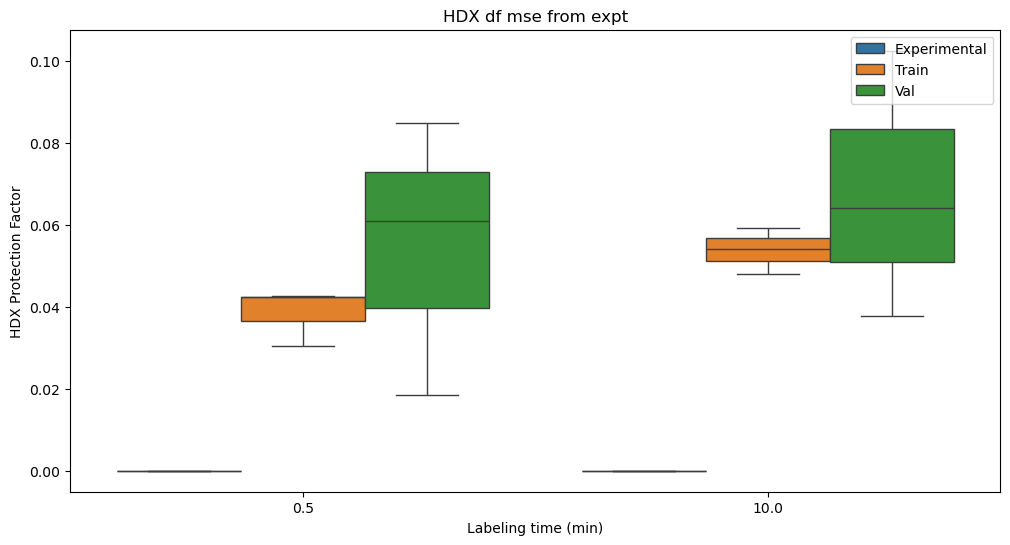

Saving experiment to:  logs/mixAandB_Sp4_1707917092.pkl


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [22]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


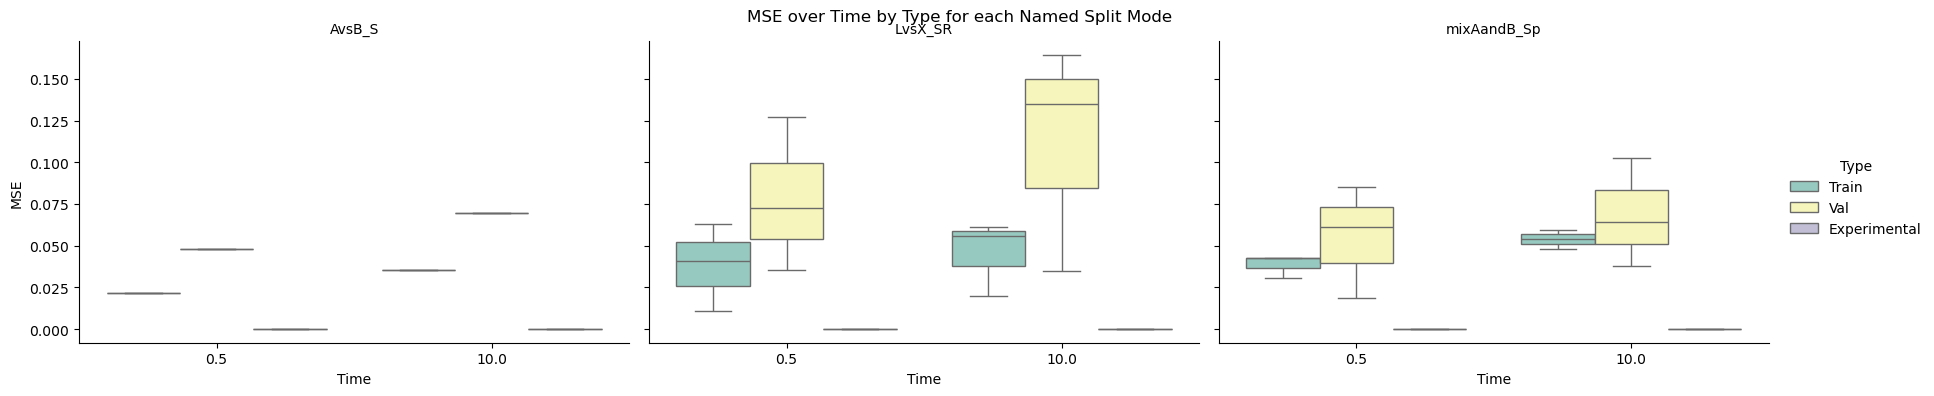

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


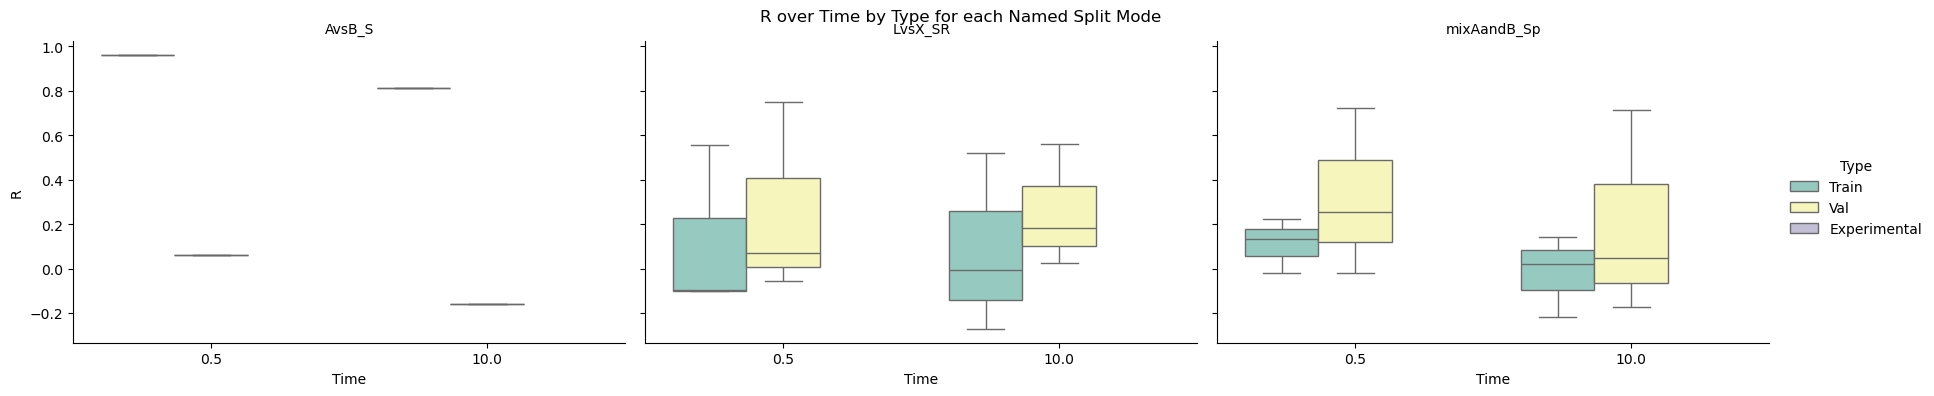

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                                LogPf              calc_name  \
0   [1.0809201385697, 1.4739820071405, 4.028884152...      train_LXRa_test_1   
1   [0.7, 0.7699999999999999, 1.0499999999999998, ...  no_weight_LXRa_test_1   
2   [14.564181524120102, 10.731828305554803, 13.97...        val_LXRa_test_1   
3   [0.982654671427, 1.0809201385697, 1.4739820071...       test_LXRa_test_1   
4   [1.0809201385697, 1.4739820071405, 4.028884152...      train_LXRa_test_2   
5   [0.7, 0.7699999999999999, 1.0499999999999998, ...  no_weight_LXRa_test_2   
6   [14.564181524120102, 10.731828305554803, 13.97...        val_LXRa_test_2   
7   [0.982654671427, 1.0809201385697, 1.4739820071...       test_LXRa_test_2   
8   [1.0809201385697, 1.4739820071405, 4.028884152...      train_LXRa_test_3   
9   [0.7, 0.7699999999999999, 1.0499999999999998, ...  no_weight_LXRa_test_3   
10  [14.564181524120102, 10.731828305554803, 13.97...        val_LXRa_test_3   
11  [0.982654671427, 1.0809201385697, 1.

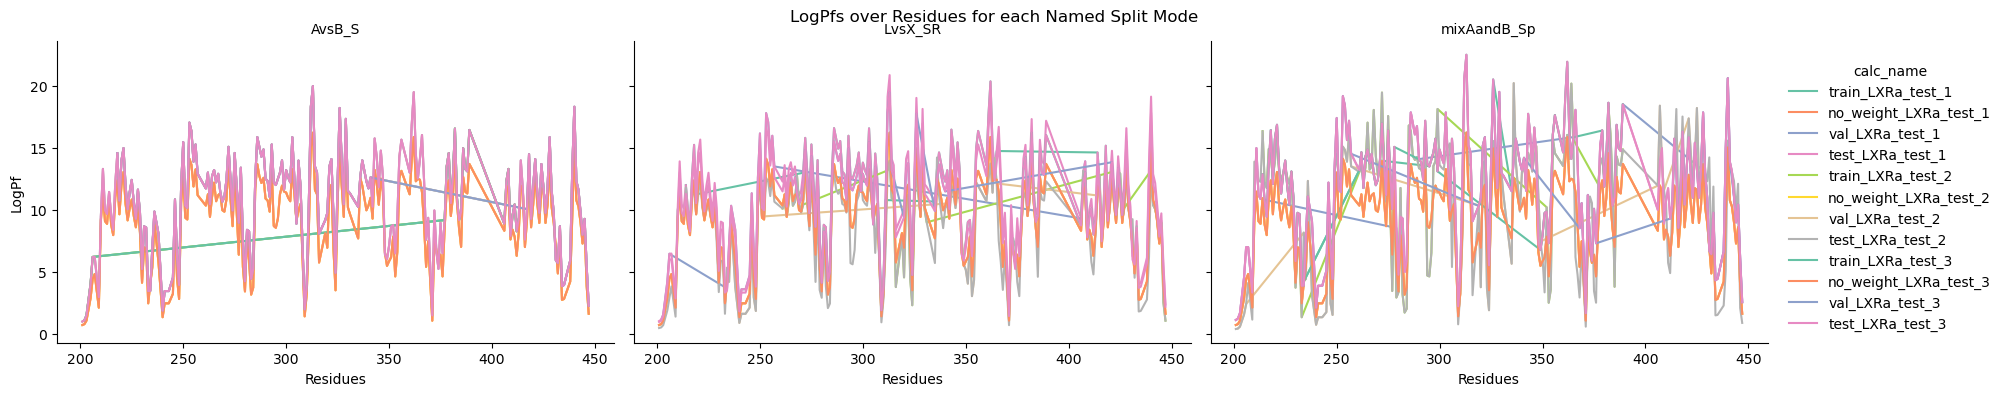

In [25]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [26]:
# from MDAnalysis.analysis.dssp import DSSP



In [27]:
# VDX.paths.head()

In [28]:
# print(top_path)

In [29]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [30]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

